In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

from orbit.utils.dataset import load_iclaims
from orbit.models.dlt import DLT
from orbit.diagnostics.plot import plot_predicted_data

from sup import *

## Load data

In [22]:
# data = pd.read_csv('data/1-14 Jan 2024, Surlari, B-x.txt', sep=" ", header=None)
file_path = 'materials/Для студентов (Геомагнитное поле)/Для студентов (Геомагнитное поле)/1-14 Jan 2024, Surlari, B-x.txt'

x = []
y = []

with open(file_path, 'r') as file:
    for line in file:
        if line.startswith('Time (Days)'):
            break
    for line in file:
        if line.strip(): 
            parts = line.split()  
            x.append(float(parts[0]))
            y.append(float(parts[-1]))

x = np.array(x)
y = np.array(y)

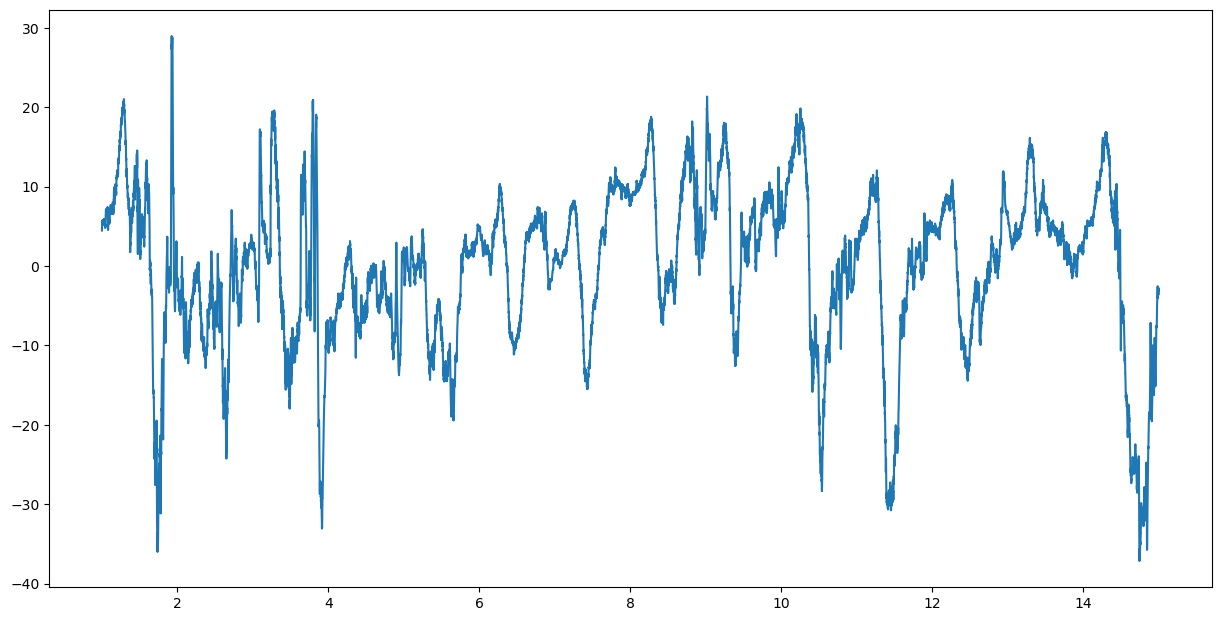

In [23]:
fig_size = 15

ym = y - y.mean()
fig = plt.figure(figsize=(fig_size, fig_size/2))
plt.plot(x,ym)

In [24]:
len(x)

20160

In [26]:
data = pd.DataFrame({
    'x': x,
    'y': ym,
})
data.to_csv('data.csv')

2024-03-18 19:49:40 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


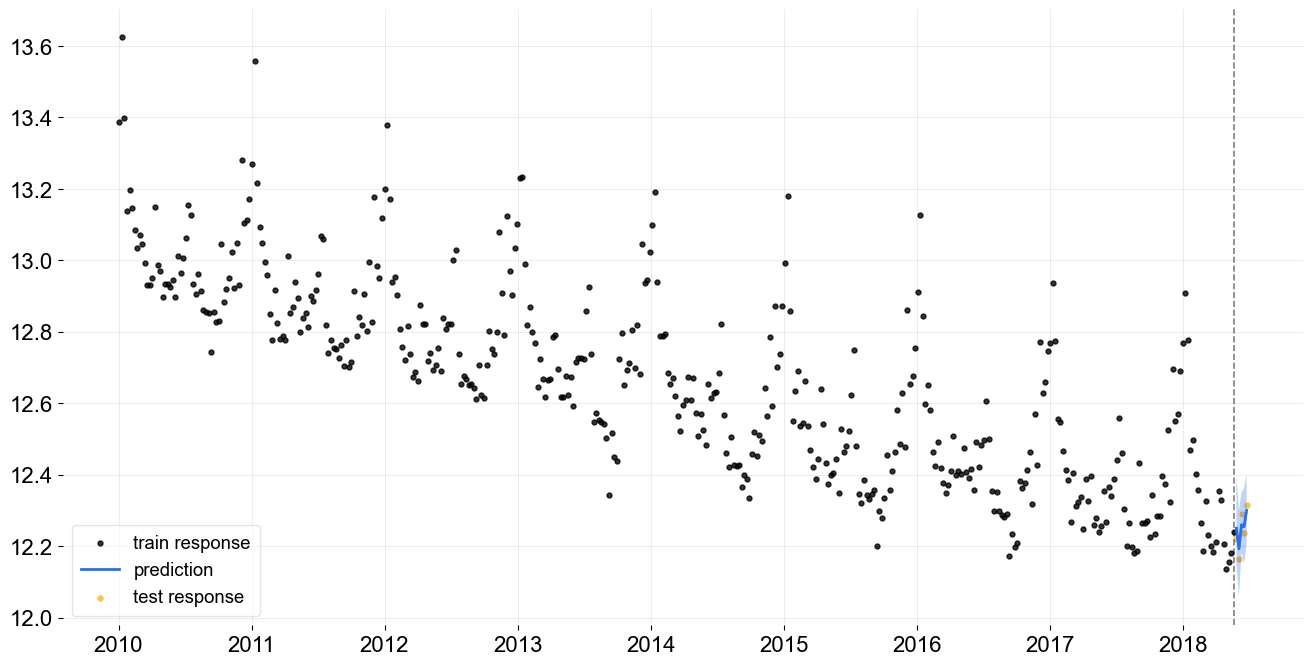

<Axes: >

In [27]:


# log-transformed data
# df = pd.DataFrame({
# 'x': [1,2,3,4,5,6,7,8,9,10],
# 'y': [1,2,3,4,5,6,7,8,9,10],
# })
df = load_iclaims()
date_col = 'week'
response_col = 'claims'
df.dtypes
# train-test split
test_size = 5
train_df = df[:-test_size]
test_df = df[-test_size:]

ets = DLT(
    response_col=response_col,
    date_col=date_col,
    seasonality=52,
    seed=2024,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)
ets.fit(df=train_df)

predicted_df = ets.predict(df=test_df)

plot_predicted_data(
    training_actual_df=train_df, predicted_df=predicted_df,
    date_col=ets.date_col, actual_col=ets.response_col,
    test_actual_df=test_df
)

In [28]:
time_diffs = x[1:] - x[:-1]
unique_values, counts = np.unique(time_diffs, return_counts=True)
diff_value_counts = dict(zip(unique_values, counts))

diff_value_counts

{0.0006943999999986517: 1344,
 0.0006943999999995398: 1536,
 0.0006943999999999839: 2272,
 0.000694400000000206: 64,
 0.000694400000000428: 5983,
 0.0006944999999998203: 6976,
 0.0006945000000000423: 512,
 0.0006945000000002644: 512,
 0.0006945000000007084: 512,
 0.0006945000000015966: 448}

## ORBIT EXPERIMENTS

In [29]:
# from orbit.utils.dataset import load_iclaims
# from orbit.models.dlt import DLT
# from orbit.diagnostics.plot import plot_predicted_data

# # log-transformed data
# # df = pd.DataFrame({
# # 'x': [1,2,3,4,5,6,7,8,9,10],
# # 'y': [1,2,3,4,5,6,7,8,9,10],
# # })
# df = load_iclaims()
# date_col = 'week'
# response_col = 'claims'
# df.dtypes
# # train-test split
# test_size = 5
# train_df = df[:-test_size]
# test_df = df[-test_size:]

# ets = DLT(
#     response_col=response_col,
#     date_col=date_col,
#     seasonality=52,
#     seed=2024,
#     estimator="stan-mcmc",
#     stan_mcmc_args={'show_progress': False},
# )
# ets.fit(df=train_df)

# predicted_df = ets.predict(df=test_df)

# plot_predicted_data(
#     training_actual_df=train_df, predicted_df=predicted_df,
#     date_col=ets.date_col, actual_col=ets.response_col,
#     test_actual_df=test_df
# )

In [30]:
x = generate_date_array(10)
print(x)

[datetime.datetime(2024, 1, 1, 0, 0) datetime.datetime(2024, 1, 2, 0, 0)
 datetime.datetime(2024, 1, 3, 0, 0) datetime.datetime(2024, 1, 4, 0, 0)
 datetime.datetime(2024, 1, 5, 0, 0) datetime.datetime(2024, 1, 6, 0, 0)
 datetime.datetime(2024, 1, 7, 0, 0) datetime.datetime(2024, 1, 8, 0, 0)
 datetime.datetime(2024, 1, 9, 0, 0) datetime.datetime(2024, 1, 10, 0, 0)]


In [31]:
print(df.week)

0     2010-01-03
1     2010-01-10
2     2010-01-17
3     2010-01-24
4     2010-01-31
         ...    
438   2018-05-27
439   2018-06-03
440   2018-06-10
441   2018-06-17
442   2018-06-24
Name: week, Length: 443, dtype: datetime64[ns]


In [32]:
import datetime

Date = datetime.datetime(2021, 7, 1, 0.0006944) 
Date

TypeError: 'float' object cannot be interpreted as an integer